# Analyze predictions

In [1]:
import ast
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# convert strings into lists
def literal_eval_column(column):
    try:
        return ast.literal_eval(column)
    except (SyntaxError, ValueError):
        return column

In [3]:
# read distilbert predictions
dist_test = pd.read_csv('outputs/distilbert_attributions.csv')
dist_test = dist_test.applymap(literal_eval_column).drop(columns=['Unnamed: 0', 'index'])

In [4]:
dist_test.head()

,attributions_pred,label_pred,score,tokens,label_gold,correct,sum_attributions_pred,mean_attributions_pred,attributions_gold,sum_attributions_gold,mean_attributions_gold
0,"[-0.011615987537462793, 0.003815996398574733, ...",rec.autos,0.801348,"[i, am, a, little, confused, on, all, of, the,...",rec.autos,True,2.790767,0.025371,"[-0.011615987537462793, 0.003815996398574733, ...",2.790767,0.025371
1,"[-0.32846125995080416, 0.021676696368081335, -...",comp.windows.x,0.915943,"[i, ', m, not, familiar, at, all, with, the, f...",comp.windows.x,True,3.255837,0.018395,"[-0.32846125995080416, 0.021676696368081335, -...",3.255837,0.018395
2,"[-0.014673215540331483, 0.1312478060786364, 0....",alt.atheism,0.072379,"[in, a, word, ,, yes, .]",alt.atheism,True,1.704919,0.284153,"[-0.014673215540331483, 0.1312478060786364, 0....",1.704919,0.284153
3,"[-0.6194980171999851, 0.0018658245313804055, 0...",talk.politics.mideast,0.808439,"[they, were, attacking, the, iraqi, ##s, to, d...",talk.politics.mideast,True,4.223599,0.008282,"[-0.6194980171999851, 0.0018658245313804055, 0...",4.223599,0.008282
4,"[-0.08235069488343288, 0.03930023488145007, -0...",alt.atheism,0.626613,"[i, ', ve, just, spent, two, solid, months, ar...",talk.religion.misc,False,1.368739,0.068437,"[-0.09691212604112631, 0.011566433822874374, -...",1.375414,0.068771


In [5]:
# read SVM predictions
svm_test = pd.read_csv('outputs/coefs_test.csv')
svm_test = svm_test.applymap(literal_eval_column).drop(columns=['Unnamed: 0'])

In [6]:
# exclude erroneous indices
with open('outputs/nohup-att-dist.out', 'r', encoding='utf-8') as f:
    lines = f.readlines()
error_indices = [int(l.split(' ')[0]) for l in lines[7:] if l]

svm_test = svm_test[~svm_test.index.isin(error_indices)]
svm_test = svm_test.reset_index()

In [7]:
svm_test.tail()

,index,true class no,true class name,pred class no,pred class name,feature ind,tfidf,feature names,coef true,coef pred,coef true*tfidf,coef pred*tfidf
7304,7527,14,sci.space,14,sci.space,"[18607, 18295, 18294, 17756, 17294, 17279, 171...","[0.017691756398058683, 0.018650733635436213, 0...","[warm, varies, varied, try, things, thermal, t...","[-0.4585002959556874, -0.4052604615314347, -0....","[-0.4585002959556874, -0.4052604615314347, -0....","[-0.008111675544485832, -0.007558404920996732,...","[-0.008111675544485832, -0.007558404920996732,..."
7305,7528,4,comp.sys.mac.hardware,4,comp.sys.mac.hardware,"[17316, 10666, 9725, 6231, 5108, 1304]","[0.14779138117244353, 0.2403323623065925, 0.20...","[thought, macs, jim, edu, day, actually]","[-0.4994580224796735, -0.15024876263583953, -0...","[-0.4994580224796735, -0.15024876263583953, -0...","[-0.0738155909799283, -0.036109640057913804, -...","[-0.0738155909799283, -0.036109640057913804, -..."
7306,7529,9,rec.sport.baseball,9,rec.sport.baseball,"[18639, 18501, 18373, 17986, 17316, 17294, 156...","[0.020255864930211472, 0.029267291360587883, 0...","[wasn, void, version, understood, thought, thi...","[-0.40429532821330094, -0.3673492016941159, -0...","[-0.40429532821330094, -0.3673492016941159, -0...","[-0.00818935156020414, -0.010751316117061054, ...","[-0.00818935156020414, -0.010751316117061054, ..."
7307,7530,6,misc.forsale,12,sci.electronics,"[18939, 18226, 18177, 18175, 17392, 16625, 166...","[0.01227474898275108, 0.028237249554259176, 0....","[work, uv, used, use, timer, stuff, student, r...","[-0.6091581217981357, -0.4379001261747615, -0....","[-0.31283400980582565, -0.1472211033427624, -0...","[-0.007477263035876224, -0.01236509514263832, ...","[-0.003839958943634, -0.004157119034742961, -0..."
7308,7531,15,soc.religion.christian,15,soc.religion.christian,"[18939, 18428, 18399, 16809, 16395, 15324, 139...","[0.025833554574752265, 0.05359619747264651, 0....","[work, viewpoint, viable, support, start, scri...","[-0.4113355308195925, -0.4774639320789409, -0....","[-0.4113355308195925, -0.4774639320789409, -0....","[-0.010626258883962635, -0.025590251189769198,...","[-0.010626258883962635, -0.025590251189769198,..."


In [8]:
assert len(svm_test) == len(dist_test)

In [9]:
def merge_subwords(tokens, attributions, aggregate='mean'):
    assert len(tokens) == len(attributions)
    # skip merged tokens
    skip_next_iteration = 0
    tokens_merged = []
    attributions_merged = []
    for i, token in enumerate(tokens):
        if skip_next_iteration != 0:
            skip_next_iteration -= 1
            continue
        if token:
            word = token
            attribution = attributions[i]
            # detokenize
                # check whether next token starts with ##
            if i < len(tokens)-1 and tokens[i+1].startswith('##'):
                # check whether further tokens start with ##
                to_merge = tokens[i:]
                count = 1
                iterator = iter(to_merge[1:])
                while True:
                    try:
                        token = next(iterator)
                        if token.startswith("##"):
                            count += 1
                        else:
                            break
                    except StopIteration:
                        break
                to_merge = to_merge[:count]
                j = len(to_merge)
                word = ''.join(tokens[i:i+j]).replace('##', '')
                attr = [attributions[i:i+j]]
                if aggregate == 'mean':
                    attribution = np.mean(attr)
                skip_next_iteration = count-1
        tokens_merged.append(word)
        attributions_merged.append(attribution)
    assert len(tokens_merged) == len(attributions_merged)
    return tokens_merged, attributions_merged

# features (SVM) != tokens (DistilBERT)
def compare_pred(i, print_result=True, mode='correl'):
    row_svm = svm_test.iloc[i]
    row_dist = dist_test.iloc[i]
    # initialize lists for common features and their attribution/coeff values
    feats = []
    val_svm_gold = []
    val_dist_gold = []
    val_svm_pred = []
    val_dist_pred = []
    # merge subwords and aggregate subword attributions
    tokens, attributions_pred = merge_subwords(row_dist.tokens, row_dist['attributions_pred'])
    tokens2, attributions_gold = merge_subwords(row_dist.tokens, row_dist['attributions_gold'])
    assert tokens == tokens2  # just in case
    for k, f in enumerate(tokens):
        # count tokens only once
        if f in feats:
            continue
        # iterate tokens, check if in SVM features
        if f in row_svm['feature names']:
            feats.append(f)
            svm_index = row_svm['feature names'].index(f)
            val_svm_gold.append(row_svm['coef true*tfidf'][svm_index])
            val_svm_pred.append(row_svm['coef pred*tfidf'][svm_index])
            # feature more than once in sentence
            if tokens.count(f) > 1:
                indices = [j for j, token in enumerate(tokens) if token == f]
                val_dist_gold.append(np.mean([attributions_gold[j] for j in indices]))
                val_dist_pred.append(np.mean([attributions_pred[j] for j in indices]))
            else:
                # feature index in distilbert tokens
                val_dist_gold.append(attributions_gold[k])
                val_dist_pred.append(attributions_pred[k])
    assert len(feats) == len(val_dist_gold)
    assert len(val_dist_gold) == len(val_dist_pred)
    assert len(val_dist_pred) == len(val_svm_gold)
    assert len(val_svm_gold) == len(val_svm_pred)
    correl_gold = np.corrcoef(val_dist_gold, val_svm_gold)
    correl_pred = np.corrcoef(val_dist_pred, val_svm_pred)
    if print_result:
        print(feats)
        print(correl_gold)
        print(correl_pred)
    if mode == 'correl':  # return correlations information
        return len(feats), len(tokens), correl_gold[0][1], correl_pred[0][1], feats
    elif mode == 'feats':  # return features, coefficients, attributions
        return feats, tokens, val_dist_gold, val_dist_pred, val_svm_gold, val_svm_pred

In [10]:
all_dist_gold = []
all_dist_pred = []
all_svm_gold = []
all_svm_pred = []

for i in range(len(svm_test)):
    if not svm_test.iloc[i]['feature ind']:  # exclude instances wo features
        continue
    _, _, val_dist_gold, val_dist_pred, val_svm_gold, val_svm_pred = compare_pred(i, print_result=False, mode='feats')
    all_dist_gold.extend(val_dist_gold)
    all_dist_pred.extend(val_dist_pred)
    all_svm_gold.extend(val_svm_gold)
    all_svm_pred.extend(val_svm_pred)

c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [11]:
all_values = pd.DataFrame({'all_dist_gold': all_dist_gold,
                           'all_dist_pred': all_dist_pred,
                           'all_svm_gold': all_svm_gold,
                           'all_svm_pred': all_svm_pred})

In [12]:
# analyze all concatenated attributions
all_values.corr()

,all_dist_gold,all_dist_pred,all_svm_gold,all_svm_pred
all_dist_gold,1.000000,0.795057,0.037089,0.024632
all_dist_pred,0.795057,1.000000,-0.026069,-0.005021
all_svm_gold,0.037089,-0.026069,1.000000,0.945506
all_svm_pred,0.024632,-0.005021,0.945506,1.000000


In [13]:
all_values.describe()

,all_dist_gold,all_dist_pred,all_svm_gold,all_svm_pred
count,303459.000000,303459.000000,303459.000000,303459.000000
mean,0.027565,0.030366,-0.009247,-0.009001
std,0.103340,0.103726,0.012641,0.011655
min,-0.997724,-0.996871,-0.556641,-0.398256
25%,-0.000397,0.000261,-0.010934,-0.010779
50%,0.006847,0.007377,-0.005900,-0.005831
75%,0.025827,0.026989,-0.003532,-0.003493
max,0.988448,0.988448,0.345678,0.345678


In [14]:
classification = {'0': 'both_true',
 '1': 'svm_true_dist_false',
 '2': 'dist_true_svm_false',
 '3': 'both_false_same_label',
 '4': 'both_false_diff_label'}

In [15]:
classification_results = []

for i, row in svm_test.iterrows():
    svm_class, dist_class = False, False
    if row['true class no'] == row['pred class no']:
        svm_class = True
    if dist_test.iloc[i].correct:
        dist_class = True
    if svm_class:
        if dist_class:  # both correct
            classification_results.append(0)
        else:
            classification_results.append(1)
    elif dist_class and not svm_class:
        classification_results.append(2)
    else:  # both false
        if row['pred class name'] == dist_test.iloc[i]['label_pred']:
            classification_results.append(3)
        else:  # different labels
            classification_results.append(4)

In [16]:
for i in range(5):
    print(i, classification_results.count(i))

0 4588
1 635
2 667
3 687
4 732


In [17]:
correls = pd.DataFrame(columns=['num_feats', 'num_tokens', 'correl_gold', 'correl_pred', 'features'])

num_instances = len(svm_test)

for i in range(num_instances):
    correls.loc[len(correls)] = list(compare_pred(i, print_result=False))

correls['classification_result'] = classification_results

c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\core\_methods.py:182: Ru

In [18]:
correls.sort_values(by='correl_gold').head(n=40)

,num_feats,num_tokens,correl_gold,correl_pred,features,classification_result
5340,2,4,-1.000000,-1.000000,"[simple, eh]",3
6923,2,11,-1.000000,-1.000000,"[discussion, tesla]",1
6876,2,4,-1.000000,1.000000,"[lou, gehrig]",1
100,2,21,-1.000000,1.000000,"[1993apr21, ca]",3
6633,2,12,-1.000000,1.000000,"[really, 10]",4
7148,2,14,-1.000000,1.000000,"[compared, os]",2
5916,2,13,-1.000000,1.000000,"[dear, come]",1
5737,2,7,-1.000000,-1.000000,"[sub, says]",4
5510,2,6,-1.000000,-1.000000,"[urban, areas]",2
5415,2,11,-1.000000,-1.000000,"[agree, joe]",4


In [19]:
correls.sort_values(by='correl_gold', na_position='first').tail(n=40)

,num_feats,num_tokens,correl_gold,correl_pred,features,classification_result
2543,4,10,0.995785,0.995785,"[works, really, bike, tony]",0
6024,3,11,0.996526,0.022986,"[apparently, second, edition]",4
5847,4,18,0.999237,0.999237,"[isn, point, better, windows]",0
1332,3,12,0.999408,0.121503,"[works, great, far]",4
5809,3,6,0.999857,-0.999560,"[thanks, bunch, nate]",4
6565,3,5,0.999980,0.999980,"[pierre, turgeon, islanders]",0
4057,2,7,1.000000,-1.000000,"[post, news]",4
489,2,6,1.000000,-1.000000,"[stuff, deleted]",4
6855,2,12,1.000000,1.000000,"[evening, sky]",0
3851,2,15,1.000000,-1.000000,"[carried, away]",4


-> highest and lowest correlations for fewest features / shortest sentences!

In [20]:
# slightly higher correlation of gold class attributions/coefficients
np.mean(correls.correl_gold), np.mean(correls.correl_pred)

(0.2826740357767589, 0.25590147310534667)

In [21]:
# correlations not related to numbers of features or tokens in a sentence
correls.corr()

,num_feats,num_tokens,correl_gold,correl_pred,classification_result
num_feats,1.000000,0.944143,-0.017452,0.023974,-0.220609
num_tokens,0.944143,1.000000,-0.039823,0.004972,-0.206382
correl_gold,-0.017452,-0.039823,1.000000,0.620412,-0.376070
correl_pred,0.023974,0.004972,0.620412,1.000000,-0.380150
classification_result,-0.220609,-0.206382,-0.376070,-0.380150,1.000000


In [23]:
label2id = {
    "alt.atheism": 0,
    "comp.graphics": 1,
    "comp.os.ms-windows.misc": 2,
    "comp.sys.ibm.pc.hardware": 3,
    "comp.sys.mac.hardware": 4,
    "comp.windows.x": 5,
    "misc.forsale": 6,
    "rec.autos": 7,
    "rec.motorcycles": 8,
    "rec.sport.baseball": 9,
    "rec.sport.hockey": 10,
    "sci.crypt": 11,
    "sci.electronics": 12,
    "sci.med": 13,
    "sci.space": 14,
    "soc.religion.christian": 15,
    "talk.politics.guns": 16,
    "talk.politics.mideast": 17,
    "talk.politics.misc": 18,
    "talk.religion.misc": 19
  }

In [24]:
dist_label_pred = [label2id[l] for l in dist_test['label_pred']]

In [25]:
# correlations
# compare predicted labels, have to ignore nan values with ma
np.corrcoef(np.ma.masked_invalid(svm_test['pred class no']),
            np.ma.masked_invalid(dist_label_pred))

array([[1.        , 0.71812724],
       [0.71812724, 1.        ]])

In [26]:
# do some nice visualizations
def barplot(feats, coeffs, attributions, outpath):
    
    # Define the x-axis positions for the tokens
    y = np.arange(len(feats))

    # Create the barplot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.barh(y + 0.175, attributions[::-1], label='DistilBERT attributions', color='red', alpha=0.7, height=0.35)
    plt.barh(y - 0.175, coeffs[::-1], label='SVM coefficients', color='blue', alpha=0.7, height=0.35)

    # Add labels and title
    plt.ylabel('Tokens', fontsize=14)
    plt.xlabel('Attributions and Coefficients', fontsize=14)
    # plt.title('Attributions Comparison')
    plt.yticks(y, feats[::-1], fontsize=14)  # Set token labels on the x-axis
    plt.legend(fontsize=14)  # Show the legend
    plt.savefig(outpath, bbox_inches='tight')

def plot(i, target='gold'):
    feats, tokens, val_dist_gold, val_dist_pred, val_svm_gold, val_svm_pred = \
        compare_pred(i, print_result=False, mode='feats')
    if target == 'gold':
        barplot(feats, val_svm_gold, val_dist_gold, outpath=f'outputs/viz/instance_{i}.png')
    elif target == 'pred':
        barplot(feats, val_svm_pred, val_dist_pred, outpath=f'outputs/viz/instance_{i}_pred.png')
    elif target == 'both':
        barplot_both(feats, val_dist_gold, val_dist_pred, val_svm_gold, val_svm_pred, outpath=f'outputs/viz/instance_{i}_both.png')

In [27]:
def barplot_both(feats, attributions_gold, attributions_pred, coeffs_gold, coeffs_pred, outpath):
    
    # Define the y-axis positions for the tokens
    y = np.arange(len(feats))
    height = 0.35/2  # Height of the bars

    # Create the horizontal stacked barplot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    # Attributions (red)
    plt.barh(y + height * 1.5, attributions_gold[::-1], height, label='Gold Attributions', color='red', alpha=0.7)
    plt.barh(y + height * 0.5, attributions_pred[::-1], height, label='Pred Attributions', color='lightcoral', alpha=0.7)

    # Coefficients (blue)
    plt.barh(y - height * 0.5, coeffs_gold[::-1], height, label='Gold Coefficients', color='blue', alpha=0.7)
    plt.barh(y - height * 1.5, coeffs_pred[::-1], height, label='Pred Coefficients', color='lightblue', alpha=0.7)


    # Add labels and title
    plt.xlabel('Attributions and Coefficients', fontsize=14)
    plt.ylabel('Tokens', fontsize=14)
    plt.yticks(y, feats[::-1], fontsize=14)  # Set token labels on the y-axis
    plt.legend(fontsize=14)  # Show the legend
    plt.tight_layout()

    # Save the plot to the specified output path
    plt.savefig(outpath)

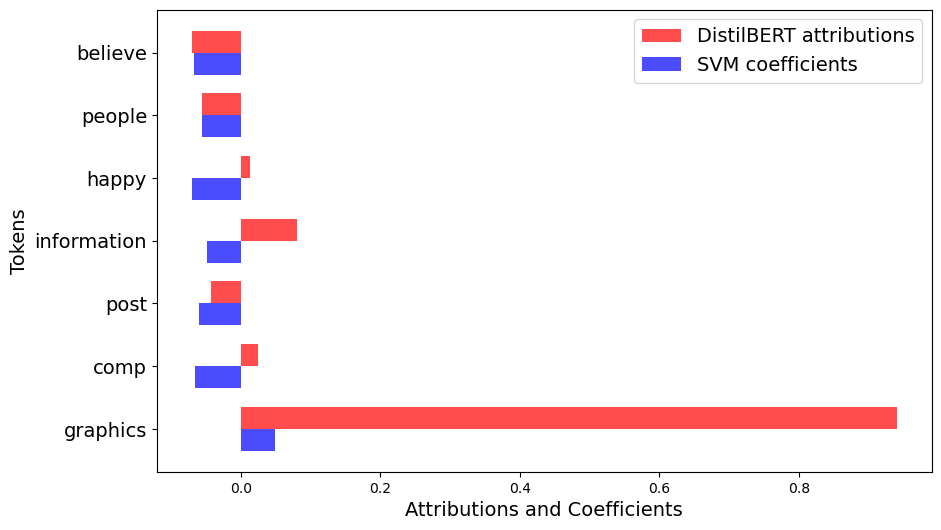

In [28]:
plot(2694)

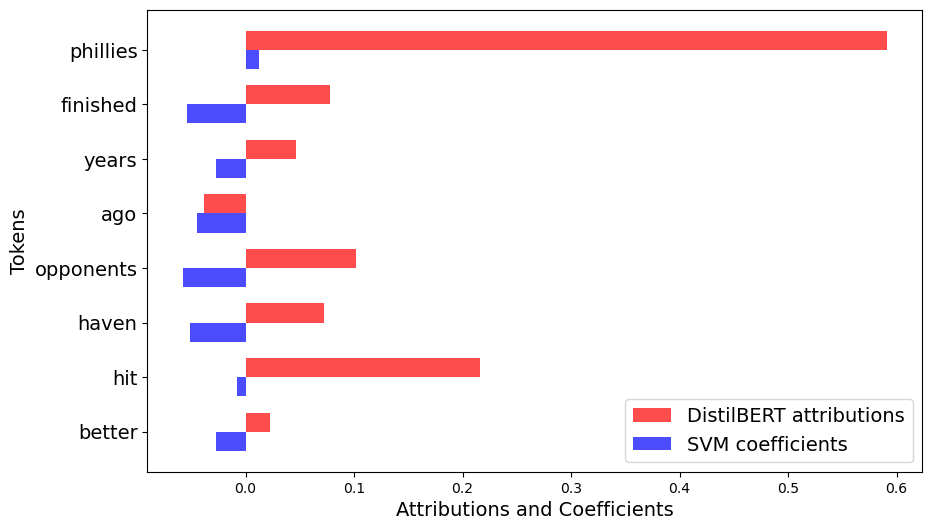

In [29]:
plot(4013)

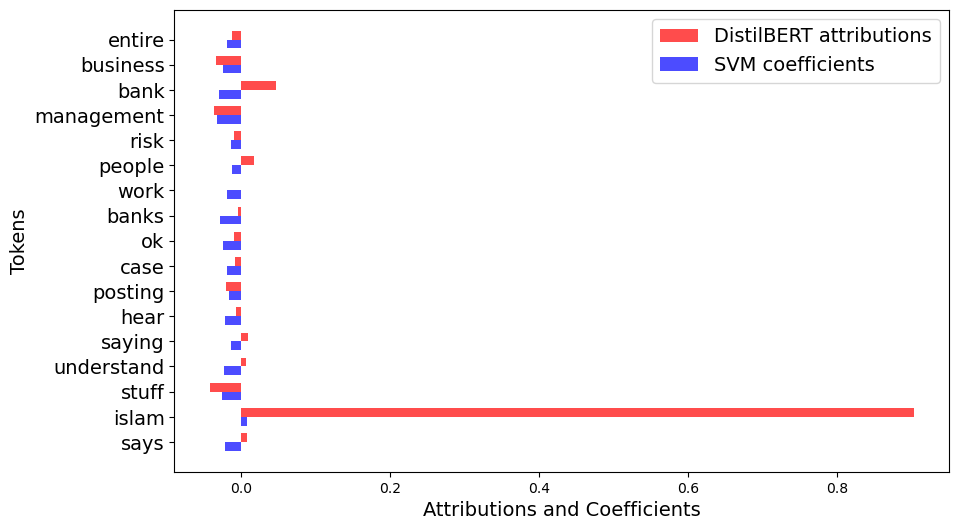

In [30]:
plot(6210, target='gold')

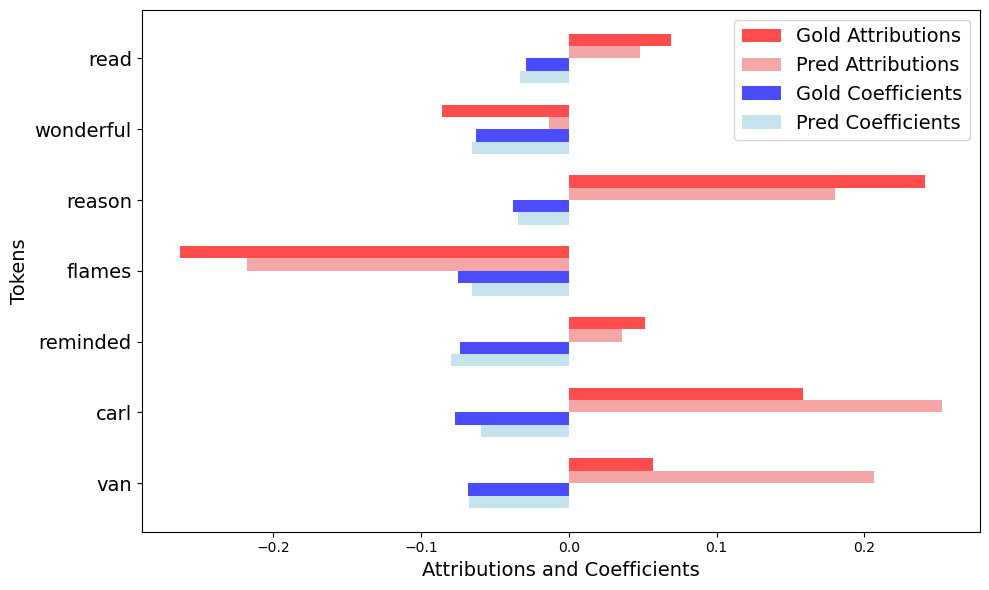

In [31]:
plot(678, target='both')

(None, None)

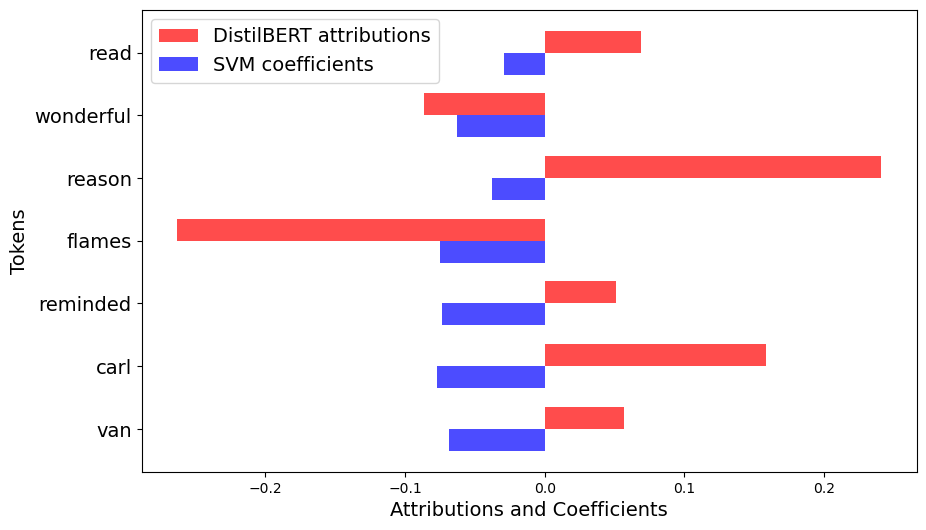

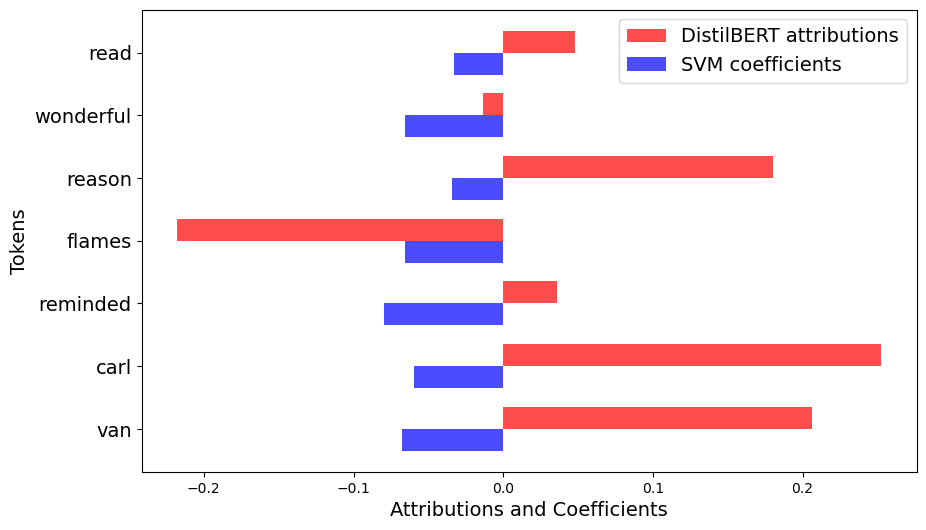

In [32]:
plot(678), plot(678, target='pred')

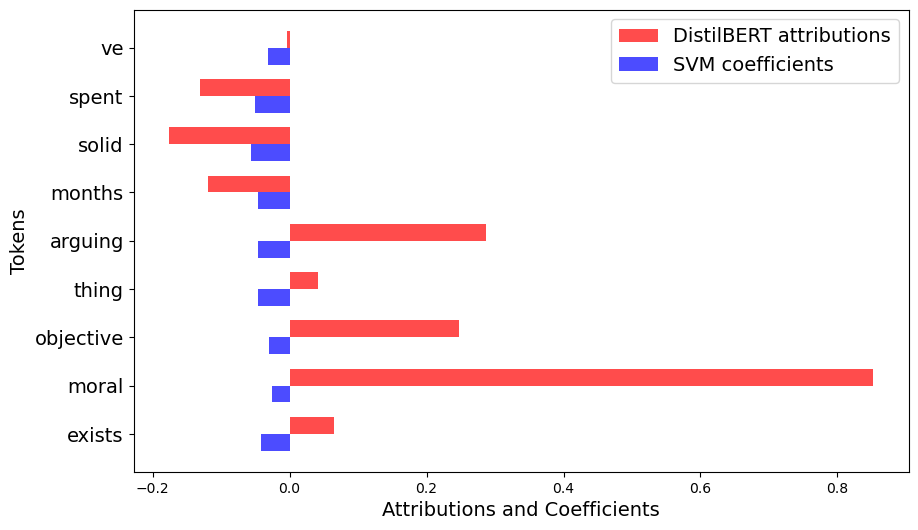

In [33]:
plot(4)

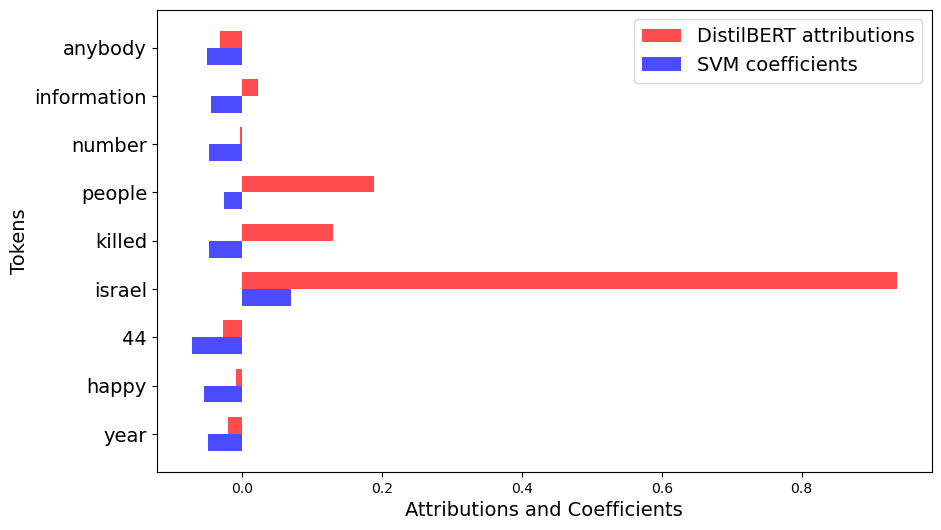

In [34]:
plot(4604)

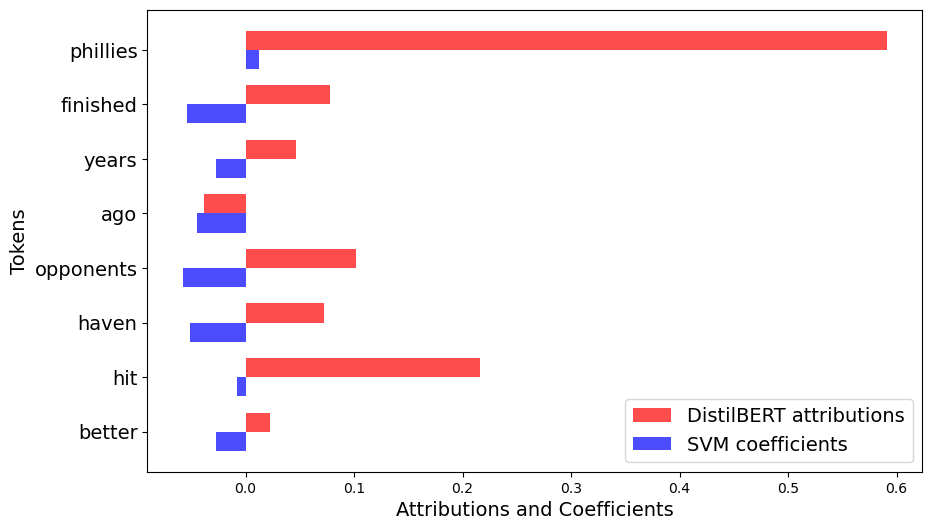

In [35]:
plot(4013)